In [22]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

### 1. Read the image

In [5]:
shoulder_img = cv2.imread('shoulder.jpg', cv2.IMREAD_GRAYSCALE)

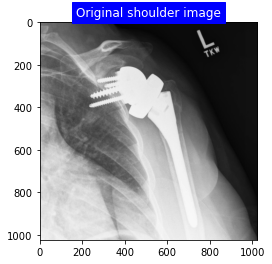

In [6]:
plt.title('Original shoulder image', color='white', backgroundcolor='blue')
plt.imshow(shoulder_img, cmap = 'gray')

In [8]:
def fourier_transform(img):
    _fft = np.fft.fft2(img)
    # shift zero-frequency component to the center  
    fourier_image = np.fft.fftshift(_fft)
    return fourier_image

In [33]:
def inverse_fourier_trans(fourier_im):
    centered_img = np.fft.ifftshift(fourier_im)
    inverse_fourier = np.fft.ifft2(centered_img)
    return inverse_fourier

In [18]:
def plot_fourier_t(original_image, fourier_image):
    # calculate log scaled magnitude of the image
    magnitude = np.abs(fourier_image)
    log_magnitude = np.log(magnitude + 1)
    # calculate the phase of the image
    phase = np.angle(fourier_image)

    # Plot
    fig = plt.figure(figsize=(15, 10))
    gs = fig.add_gridspec(1, 4)

    # Original transform
    ax2 = fig.add_subplot(gs[0, 0])
    ax2.imshow(original_image, cmap='gray')
    ax2.set_title('Original image', color='white', backgroundcolor='blue')

    # Fourier transform
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(magnitude, cmap='gray')
    ax2.set_title('Magnitude image', color='white', backgroundcolor='blue')

    # Log scaled magnitude
    ax2 = fig.add_subplot(gs[0, 2])
    ax2.imshow(log_magnitude, cmap='gray')
    ax2.set_title('Log scaled magnitude', color='white', backgroundcolor='blue')

    # Phase
    ax2 = fig.add_subplot(gs[0, 3])
    ax2.imshow(phase, cmap='gray')
    ax2.set_title('Phase', color='white', backgroundcolor='blue')

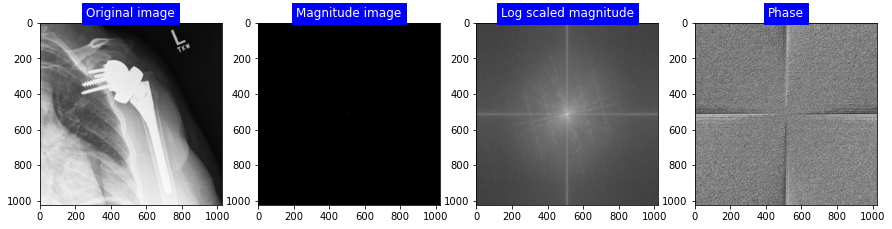

In [19]:
fourier_img = fourier_transform(shoulder_img)
plot_fourier_t(shoulder_img, fourier_img)

In [21]:
print(fourier_img.shape)

(1024, 1024)


#### The function to calculate the distance between u and v is as follows:

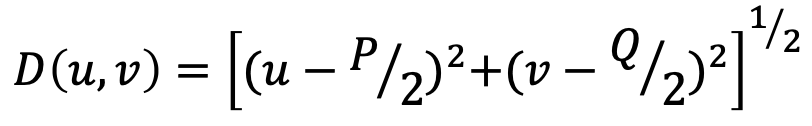

#### Ideal LPF formula:

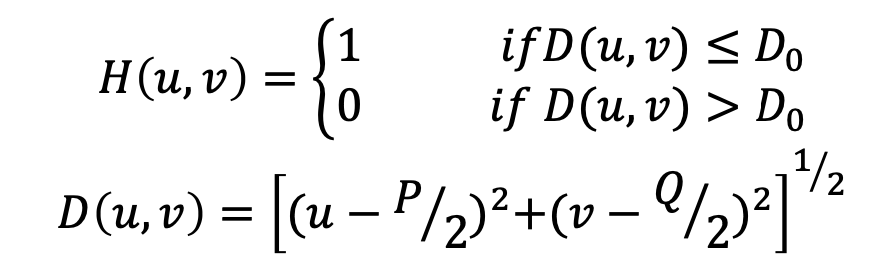

#### Butterworth LPF formula:

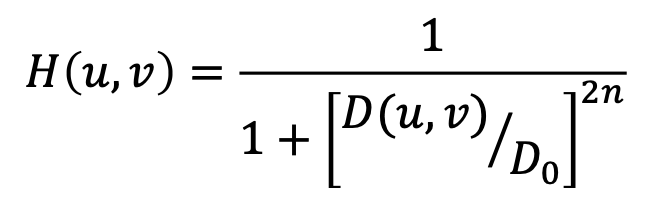

#### Gaussian LPF formula:

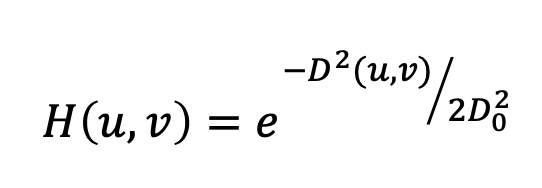

In [23]:
def calc_distance(u, v, shape):
    P, Q = shape[0], shape[1]
    return math.sqrt(math.pow((u - P//2), 2) + math.pow((v - Q//2), 2))

In [28]:
def apply_filters(original_image, filter_type, filter_params, n=None):
    shape = original_image.shape
    filter = np.zeros(shape, dtype=np.float32)
    complement = np.ones(shape)

    # detect filter type
    if 'ideal' in filter_type:
        for i in range(shape[0]):
            for j in range(shape[1]):
                filter[i, j] = 0 if calc_distance(i, j, shape) >= filter_params else 1
    elif 'butterworth' in filter_type:
        for i in range(shape[0]):
            for j in range(shape[1]):
                filter[i, j] = 1/(1 + math.pow((calc_distance(i, j, shape)/filter_params), 2*n))

    elif 'gaussian' in filter_type:
        for i in range(shape[0]):
            for j in range(shape[1]):
                filter[i, j] =  math.exp(-math.pow(calc_distance(i, j, shape), 2) / (2 * math.pow(filter_params, 2)))

    # high-pass or low-pass
    if 'LP' in filter_type:
        return filter
    else:
        return complement - filter

In [31]:
# radius = 50
ideal_50 = apply_filters(shoulder_img, 'LP_ideal', 50)*fourier_img
bw_50 = apply_filters(shoulder_img, 'LP_butterworth', 50, n=2)*fourier_img
gaussian_50 = apply_filters(shoulder_img, 'LP_gaussian', 50)*fourier_img

# radius = 100
ideal_100 = apply_filters(shoulder_img, 'LP_ideal', 100)*fourier_img
bw_100 = apply_filters(shoulder_img, 'LP_butterworth', 100, n=2)*fourier_img
gaussian_100 = apply_filters(shoulder_img, 'LP_gaussian', 100)*fourier_img

# radius = 200
ideal_200 = apply_filters(shoulder_img, 'LP_ideal', 200)*fourier_img
bw_200 = apply_filters(shoulder_img, 'LP_butterworth', 200, n=2)*fourier_img
gaussian_200 = apply_filters(shoulder_img, 'LP_gaussian', 200)*fourier_img

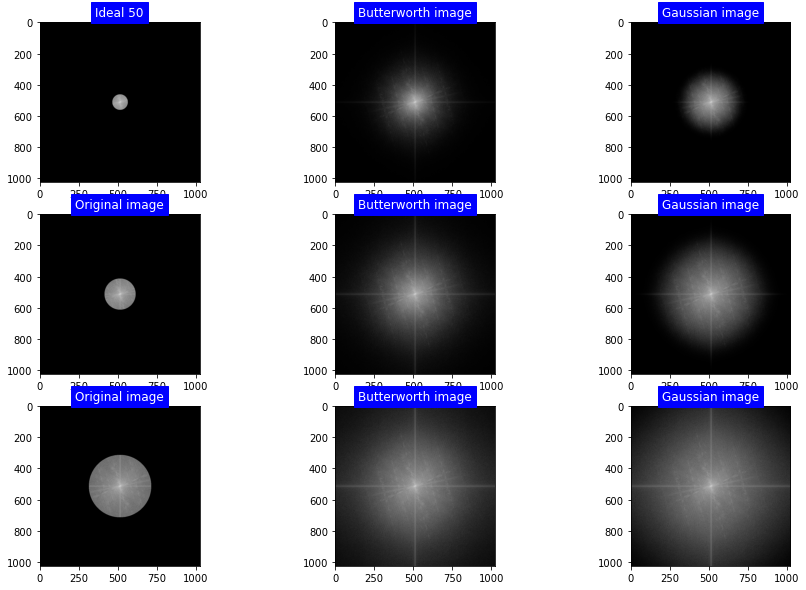

In [32]:
def log_abs(img):
    '''
    :param img: the image to be transformed
    :return the log scaled magnitude of the image
    '''
    magnitude = np.abs(img)
    log_magnitude = np.log(magnitude + 1)
    return log_magnitude

# Plot
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)

############### radius = 50
# LP ideal 
ax2 = fig.add_subplot(gs[0, 0])
ax2.imshow(log_abs(ideal_50), cmap='gray')
ax2.set_title('Ideal 50', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(log_abs(bw_50), cmap='gray')
ax2.set_title('Butterworth image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(log_abs(gaussian_50), cmap='gray')
ax2.set_title('Gaussian image', color='white', backgroundcolor='blue')

############### radius = 100
# LP ideal 
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(log_abs(ideal_100), cmap='gray')
ax2.set_title('Original image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(log_abs(bw_100), cmap='gray')
ax2.set_title('Butterworth image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[1, 2])
ax2.imshow(log_abs(gaussian_100), cmap='gray')
ax2.set_title('Gaussian image', color='white', backgroundcolor='blue')

############### radius = 200
# LP ideal 
ax2 = fig.add_subplot(gs[2, 0])
ax2.imshow(log_abs(ideal_200), cmap='gray')
ax2.set_title('Original image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[2, 1])
ax2.imshow(log_abs(bw_200), cmap='gray')
ax2.set_title('Butterworth image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(log_abs(gaussian_200), cmap='gray')
ax2.set_title('Gaussian image', color='white', backgroundcolor='blue')

plt.show()

#### Apply filters to images

In [36]:
ideal_50_image = np.abs(inverse_fourier_trans(ideal_50))
bw_50_image = np.abs(inverse_fourier_trans(bw_50))
gaussian_50_image = np.abs(inverse_fourier_trans(gaussian_50))

ideal_100_image = np.abs(inverse_fourier_trans(ideal_100))
bw_100_image = np.abs(inverse_fourier_trans(bw_100))
gaussian_100_image = np.abs(inverse_fourier_trans(gaussian_100))

ideal_200_image = np.abs(inverse_fourier_trans(ideal_200))
bw_200_image = np.abs(inverse_fourier_trans(bw_200))
gaussian_200_image = np.abs(inverse_fourier_trans(gaussian_200))

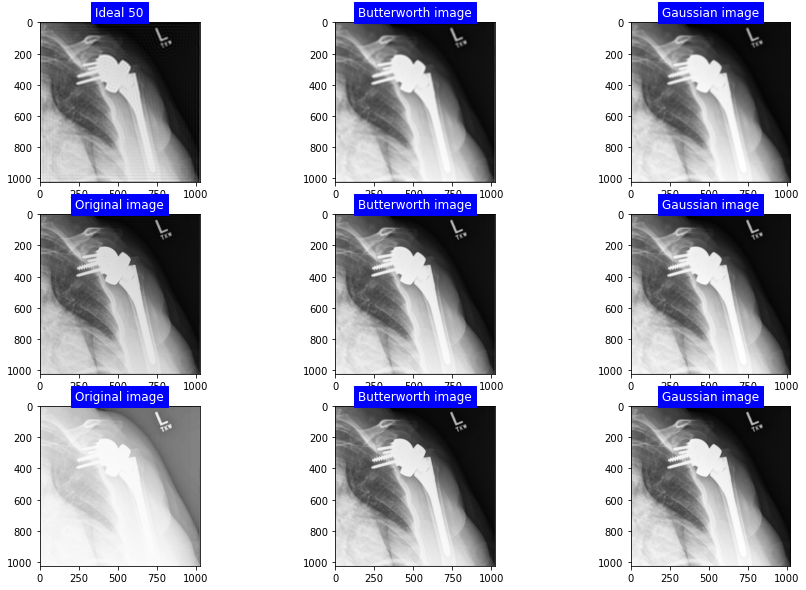

In [37]:
# Plot
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)

############### radius = 50
# LP ideal 
ax2 = fig.add_subplot(gs[0, 0])
ax2.imshow(ideal_50_image, cmap='gray')
ax2.set_title('Ideal 50', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(bw_50_image, cmap='gray')
ax2.set_title('Butterworth image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(gaussian_50_image, cmap='gray')
ax2.set_title('Gaussian image', color='white', backgroundcolor='blue')

############### radius = 100
# LP ideal 
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(ideal_100_image, cmap='gray')
ax2.set_title('Original image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(bw_100_image, cmap='gray')
ax2.set_title('Butterworth image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[1, 2])
ax2.imshow(gaussian_100_image, cmap='gray')
ax2.set_title('Gaussian image', color='white', backgroundcolor='blue')

############### radius = 200
# LP ideal 
ax2 = fig.add_subplot(gs[2, 0])
ax2.imshow(log_abs(ideal_200_image), cmap='gray')
ax2.set_title('Original image', color='white', backgroundcolor='blue')

# LP butterworth 
ax2 = fig.add_subplot(gs[2, 1])
ax2.imshow(bw_200_image, cmap='gray')
ax2.set_title('Butterworth image', color='white', backgroundcolor='blue')

# LP gaussian
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(gaussian_200_image, cmap='gray')
ax2.set_title('Gaussian image', color='white', backgroundcolor='blue')

plt.show()